# Geocoding API


In [52]:
import herepy
import pandas as pd
from tqdm import tqdm 
import time
import math

geocoderApi = herepy.GeocoderApi('ZJD1l_bw7yOZjJ9nDXoCNCVv5d-9nute2h9mcsgWsxE')
geocoderReverseApi = herepy.GeocoderReverseApi('ZJD1l_bw7yOZjJ9nDXoCNCVv5d-9nute2h9mcsgWsxE')

## Tuguegarao

In [2]:
df = pd.read_csv('Mago_copy_Cavolun_initiative.csv')

In [19]:
df = df[(df['USABLE ADDRESS'] == 'Yes') | (df['REVISED ADDRESS'].notnull())]

## GeoCoder

The process of converting an address to a specific coordinate

In [20]:
response = geocoderApi.free_form('Annafunan boundary , Tuguegarao City, Cagayan')

In [33]:
# response.as_dict()
pd.DataFrame(response.as_dict()['items']).head(1)['position'][0]['lng']

121.72307

In [44]:
df = df.reset_index(drop = True)

In [158]:
df.head(14)

,Unnamed: 0,address,AREA,USABLE ADDRESS,REVISED ADDRESS,Google Maps Link,RESCUE STATUS,"CONTACT STATUS (Contacted, Cannot be reached)",DATE AND TIME CONTACTED,PERSONS TO RESCUE,Contact Number\n ANOTHER NOTE: Countless rescuers na ang namatay dahil naelectrocute ng generators. INFORM PEOPLE SA CAGAYAN TO TURN OFF THEIR GENERATORS. Buhay muna ng rescuers bago ang kuryente!!,NOTES,"CONTACT UPDATE: (PLEASE CALL THEM, IF NOT POSSIBLE, PLEASE PROVIDE LOAD BAGO MAGTEXT DAHIL BAKA KAYA DI SILA MAKAPAGREPLY AY DAHIL WALANG LOAD)","Counterchecked # for doubles? (Green okay, yellow may double, red double--pls indicate reference cell)",lat,lng,geometry
0,0,Zone 6 Taguinod Street,East: Namabbalan-Capatan,Yes,NaN,NaN,Not yet responded,Contacted,NaN,Bambie Catadal 21 adults and 1 baby,Active number: 9658475124,nag respond po siya kanina as of 06:11 am. nas...,"texted at 3:21am (no response) 3:53 am, call e...",NaN,17.62639,17.62639,POINT (17.62639 17.62639)
1,1,86 provincial road linao east Cagurangan street,North: Carig-Caritan,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.65185,17.65185,POINT (17.65185 17.65185)
2,2,125 SUNSHINE VALLEY HOMES ATULAYAN NORTE,North: Carig-Caritan,Yes,NaN,NaN,NaN,Cannot be reached,4:20am nov 14,NaN,9754180036,NaN,food,NaN,17.63466,17.63466,POINT (17.63466 17.63466)
3,3,"Diosdado Macapagal Avenue, Balzain East Tugueg...",Cetro,Yes,"Diosdado Macapagal Avenue, Balzain East Tugueg...",NaN,NaN,NaN,NaN,Mother ni Beverly Sibbaluca,NaN,NaN,NaN,NaN,17.61910,17.61910,POINT (17.61910 17.61910)
4,4,Linao east taguinod st zone 5,West: Buntun-Ugac,Yes,NaN,NaN,NaN,NaN,NaN,trumata family,NaN,NaN,NaN,NaN,17.65305,17.65305,POINT (17.65305 17.65305)
5,5,zone 4 duhat street barangay capatan malapit s...,East: Namabbalan-Capatan,Yes,zone 4 duhat street barangay capatan,NaN,Not yet responded,Cannot be reached,4:26 am Nov. 14,6 people,9753262686,NaN,NaN,NaN,17.61578,17.61578,POINT (17.61578 17.61578)
6,6,zone 4 duhat street barangay Capatan near the...,East: Namabbalan-Capatan,Yes,zone 4 duhat street barangay Capatan,NaN,NaN,NaN,NaN,children of janice banan furigay,NaN,NaN,NaN,NaN,17.61578,17.61578,POINT (17.61578 17.61578)
7,7,Don Domingo likod ng PTU,Cetro,Yes,Don Domingo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.62400,17.62400,POINT (17.62400 17.62400)
8,8,balzain likod ng unitop,Cetro,Yes,Balzain,NaN,NaN,NaN,NaN,"garcia family, with 5 children",NaN,NaN,NaN,NaN,17.62403,17.62403,POINT (17.62403 17.62403)
9,9,balzain west 208 rivero street centro 12 sa ma...,Cetro,Yes,balzain west 208 rivero street centro 12,NaN,NaN,Cannot be reached,10:26 am 11/14/2020,Sheng Tagoc / 10 people with kids,6.39351E+11,NaN,NaN,NaN,17.61814,17.61814,POINT (17.61814 17.61814)


In [159]:
lat_list = []
lng_list = []
with tqdm(total=df.shape[0]) as pbar:
    for index, row in df.iterrows():
        pbar.update(1)
                
        try:
            if pd.isnull(row['REVISED ADDRESS']):
                address = row['address']
            else:
                address = row['REVISED ADDRESS']
        except:
            address = row['REVISED ADDRESS']
            
        if "tuguegarao" in address.lower():
            address = address + ', Cagayan'
        else:
            address = address + ', Tuguegarao City, Cagayan'
                    
        response = geocoderApi.free_form(address)
        try:
            lat = pd.DataFrame(response.as_dict()['items']).head(1)['position'][0]['lat']
            long = pd.DataFrame(response.as_dict()['items']).head(1)['position'][0]['lng']
            
            lat_list.append(lat)
            lng_list.append(long)
        except:
            lat_list.append(0)
            lng_list.append(0)
        time.sleep(2)

 99%|█████████▉| 387/389 [15:12<00:04,  2.36s/it]


AttributeError: 'float' object has no attribute 'lower'

In [160]:
test = pd.concat([df,pd.Series(lat_list),pd.Series(lng_list)], ignore_index=True, axis=1)
df['lat'] = test[17]
df['lng'] = test[18]

In [192]:
df.to_csv('tuguegeocoded_locations.csv')

## GEOPANDAS

GeoPandas is an open source project to make working with geospatial data in python easier.

In [224]:
df = df[df['lng'] != 0]
df = df[df['lat'] != 0]

In [249]:
import geopandas as gpd
import matplotlib.pyplot as plt

#### Converting our scraped data to geopandas format

In [256]:
df = pd.read_csv('tugue_geocoded_locations.csv')

In [257]:
# Converting the 
df['lat'] = df['lat'].astype(float)
df['lng'] = df['lng'].astype(float)

In [258]:
df = df[(df['lng'] >= 121.68) & (df['lng'] <= 121.85)]
df = df[(df['lat'] >= 17.525) & (df['lat'] <= 17.7)]

In [259]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.lng, df.lat))

<AxesSubplot:>

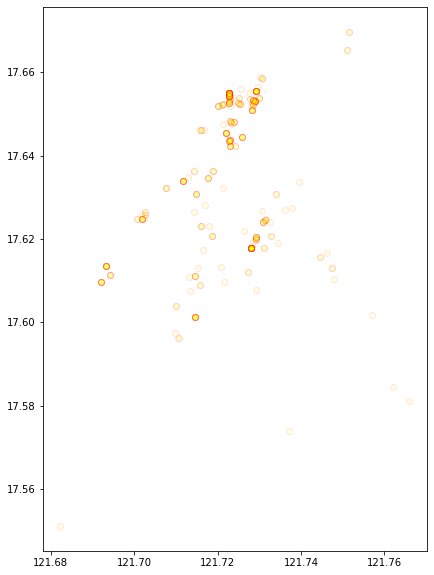

In [260]:
gdf.plot(figsize=(10, 10), alpha=0.1, color =  'yellow', edgecolor='red')

#### Reading a shp file to map out the Philippines

In [264]:
ph = gpd.read_file('ph_shp/MuniCities.shp')
ph = ph[ph['NAME_2'] == 'Tuguegarao City']

<AxesSubplot:>

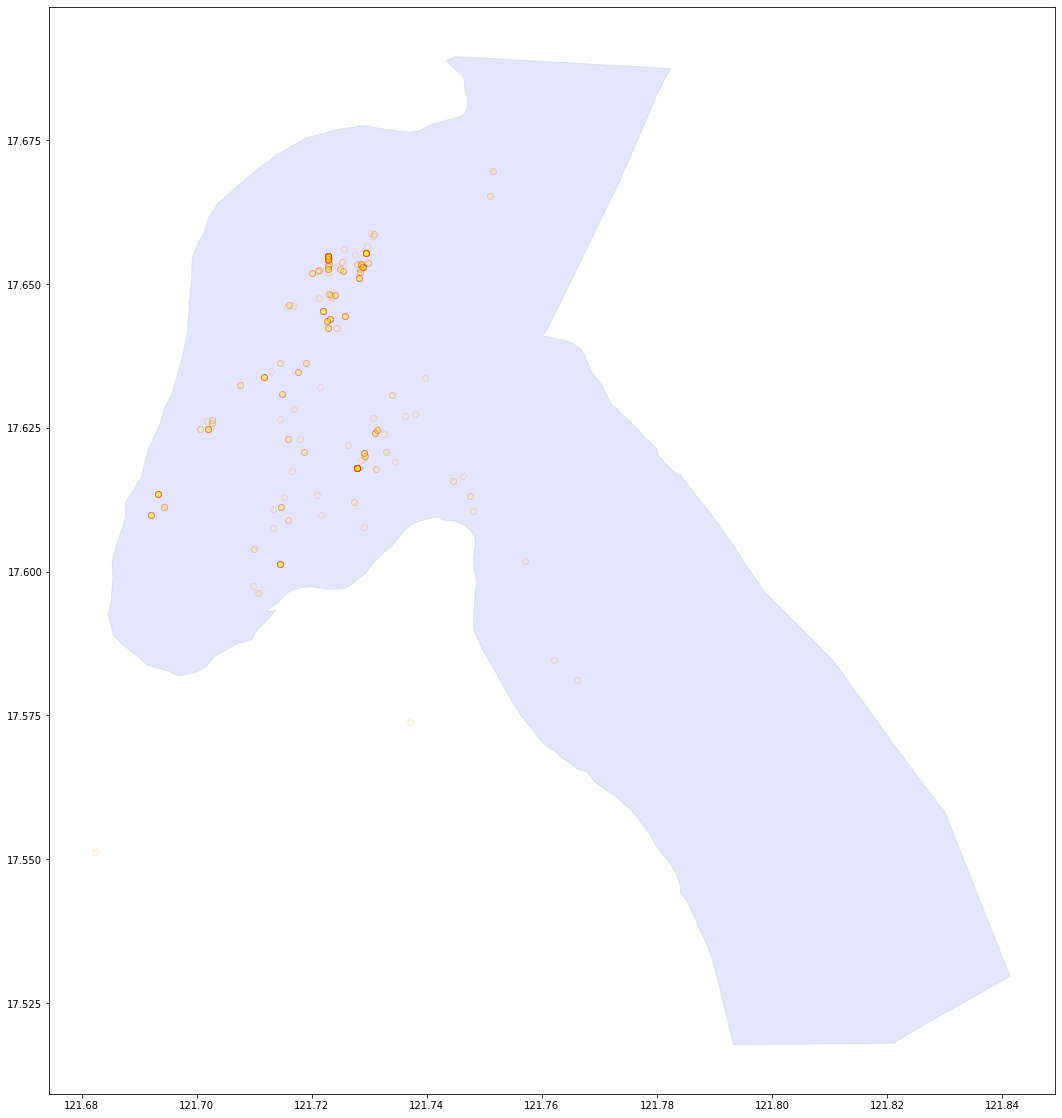

In [265]:
ax = ph.plot(figsize=(20, 20), alpha=0.1, color =  'blue', edgecolor='green')
gdf.plot(ax = ax, alpha=0.1, color =  'yellow', edgecolor='red')

## Adding More Context 

In [155]:
import contextily as ctx

In [238]:
# Convert coordinate reference system

gdf.crs = {'init' :'epsg:4326'}
gdf = gdf.to_crs(epsg=3857)

ph = ph.to_crs(epsg=3857)

C:\Anaconda\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Anaconda\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


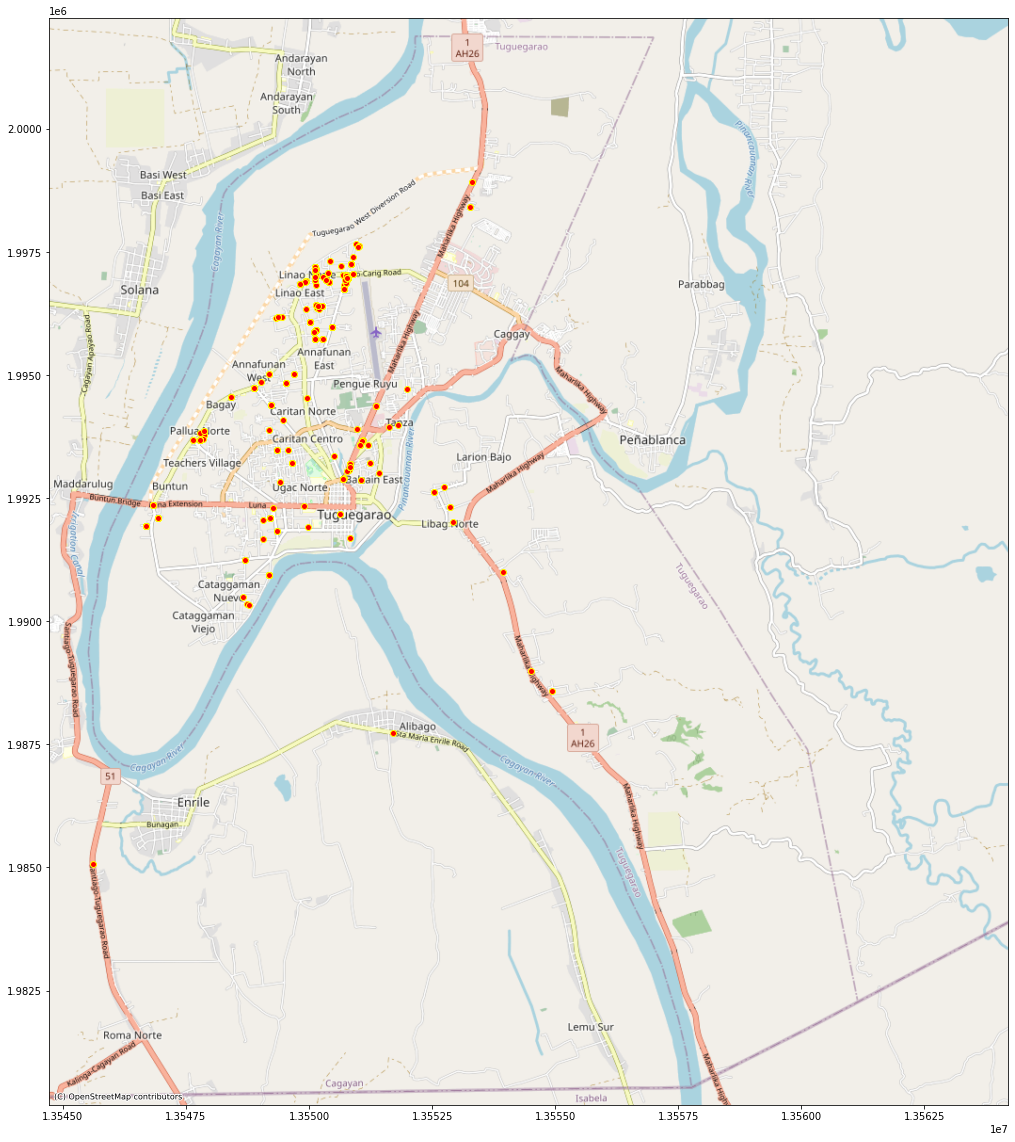

In [255]:
ax = ph.plot(figsize=(20, 20), alpha=0.0, color =  'blue', edgecolor='green')
ax = gdf.plot(ax = ax, color =  'red', edgecolor='yellow')
ax = ctx.add_basemap(ax,source=ctx.providers.OpenStreetMap.Mapnik)
plt.savefig('world.jpg')

In [266]:
!pip install folium

In [268]:
import folium

In [284]:
map1 = folium.Map(
    location=[17.6445371,121.7259032 ],
    tiles='cartodbpositron',
    zoom_start=12,
)
df.apply(lambda row:folium.CircleMarker(location=[row["lat"], row["lng"]]).add_to(map1), axis=1)
map1

In [287]:
map1.save('tuguegarao.html')